In [1]:
# standard imports I always use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Examples of using a module ```cmshelp``` to fetch and clean the CMS synthetic files

This notebook is just an example of how to use the CMS synthetic files with pandas.
All of the columns in the different files that correspond to different ICD9 codes and HCPCS codes are retained, but additional
columns are added with the code description.

### Getting the urls of the files

First import the module and call this function to get the urls for the 20 different samples:

```cmshelp.get_url_list_sample_i(i=1)``` takes a single argument corresponding to which of the 20 samples of the synthetic data 
you want to fetch.

In [2]:
import cmshelp

In [3]:
url_list_1 = cmshelp.get_url_list_sample_i(1)
url_list_2 = cmshelp.get_url_list_sample_i(2)

In [5]:
url_list_1

['https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_Beneficiary_Summary_File_Sample_1.zip',
 'http://downloads.cms.gov/files/DE1_0_2008_to_2010_Carrier_Claims_Sample_1A.zip',
 'http://downloads.cms.gov/files/DE1_0_2008_to_2010_Carrier_Claims_Sample_1B.zip',
 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.zip',
 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.zip',
 'http://downloads.cms.gov/files/DE1_0_2008_to_2010_Prescription_Drug_Events_Sample_1.zip',
 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE1_0_2009_Beneficiary_Summary_File_Sample_1.zip',
 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/DE

### <font color='teal'>Beneficiary files</font>

The 3 beneficiary file urls in each of the 20 samples are at indices 0, 6, and 7.
To make the corresonding dataframes, call the function
```cmshelp.make_clean_bene(url)```  which takes a url as an argument.
We will change this appropriately when working with files.

The date type columns ```BENE_BIRTH_DT``` and ```BENE_DEATH_DT``` have been turned into pandas datetime objects.
And the ```SP_STATE_CODE``` information has been used to create three columns ```elevatoin```, ```lat```, ```lng```, as well as the text columns ```state``` and ```county```.

In [6]:
dfbene_sample1_0 = cmshelp.make_clean_bene(url_list_1[0])

In [7]:
dfbene_sample1_0.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR', 'state',
       'crosswalk', 'County', 'State', 'SSA State county code',
       'FIPS State county code', 'CBSA (blanks are rural)',
       'CBSA name (Blanks are rural)', 'State Abbreviation', 'State FIPS Code',
       'County FIPS Code', 'FIPS Entity Code', 'ANSI Code', 'GU Name',
       'Entity Description', 'FIPScombo', 'address', 'county', 'elevation',
       'lat', 'lng'],
      dtype='object')

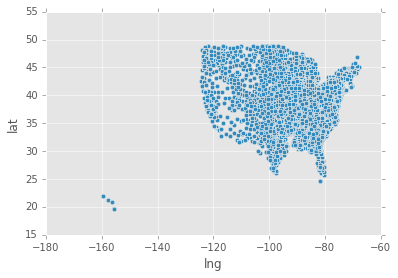

In [8]:
dfbene_sample1_0.plot.scatter('lng','lat')  # no Alaska??

#### Just for fun, interactive plot showing the elevation.

You need ```plotly``` installed.

You can install it within a notebook by running

```
!pip install plotly     
```


within a cell.

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import plotly
plotly.offline.init_notebook_mode()

data = []
cluster = []
#colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(dfbene_sample1_0['State'].unique())):
    name = dfbene_sample1_0['State'].unique()[i]
    #color = colors[i]
    x = dfbene_sample1_0[ dfbene_sample1_0['State'] == name ]['lng']
    y = dfbene_sample1_0[ dfbene_sample1_0['State'] == name ]['lat']
    z = dfbene_sample1_0[ dfbene_sample1_0['State'] == name ]['elevation']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Beneficiary file',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

#py.iplot(fig, filename='pandas-3d-benefile', validate=False)

plotly.offline.iplot(fig, validate=False)

Plotting the information in the datetype columns:

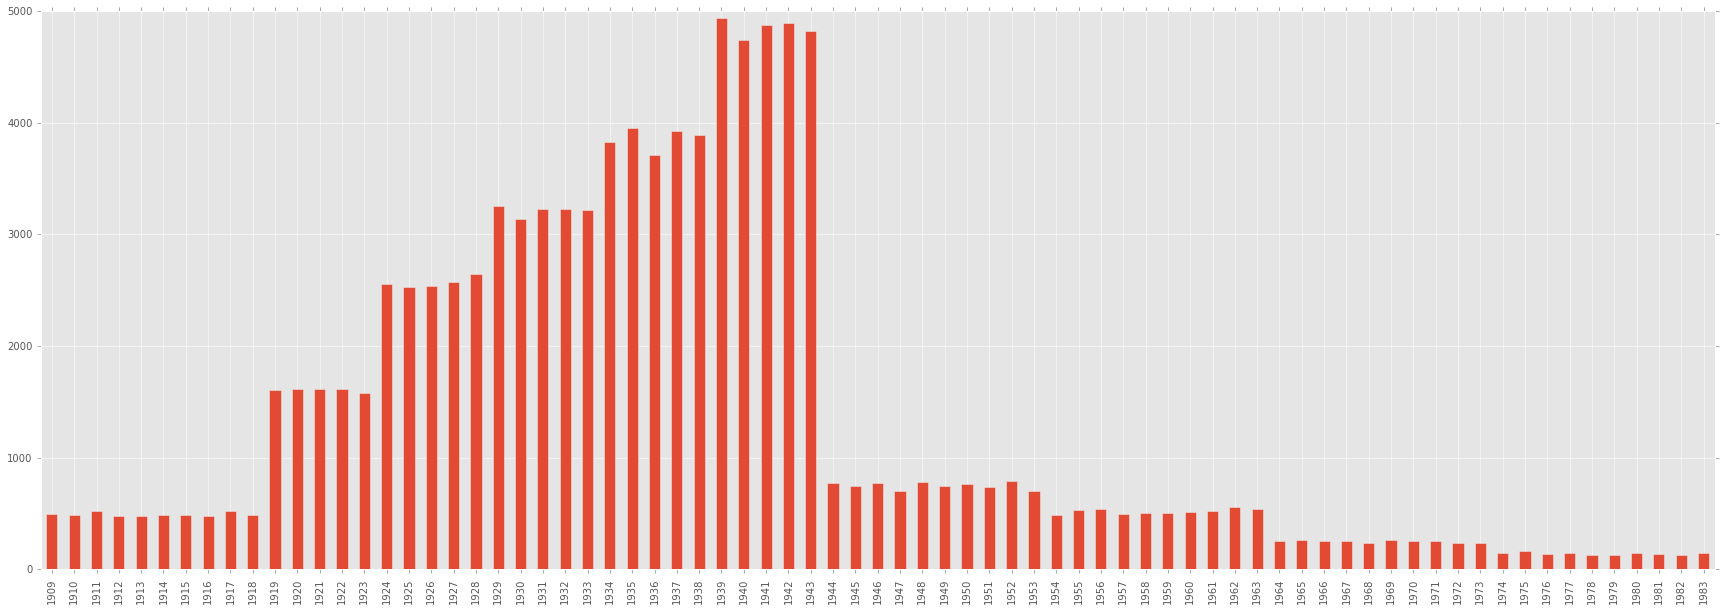

In [12]:
dfbene_sample1_0['BENE_BIRTH_DT'].dt.year.value_counts().sort_index().plot(kind='bar',figsize=(30,10))

In [13]:
del dfbene_sample1_0

### <font color='teal'>Carrier Files</font>

Carrier claims files are in indeces 1 and 2 of the url lists.

You can make the corresponding dataframe by calling

```cmshelp.make_clean_carrier(url)```

In [14]:
dfcarrier_sample1_1 = cmshelp.make_clean_carrier(url_list_1[1])

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: DtypeWarning:

Columns (9,10,11,46,47,48,49,50,135,136,137,138,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.



In [16]:
list(dfcarrier_sample1_1.columns)

['DESYNPUF_ID',
 'CLM_ID',
 'CLM_FROM_DT',
 'CLM_THRU_DT',
 'ICD9_DGNS_CD_1',
 'ICD9_DGNS_CD_2',
 'ICD9_DGNS_CD_3',
 'ICD9_DGNS_CD_4',
 'ICD9_DGNS_CD_5',
 'ICD9_DGNS_CD_6',
 'ICD9_DGNS_CD_7',
 'ICD9_DGNS_CD_8',
 'PRF_PHYSN_NPI_1',
 'PRF_PHYSN_NPI_2',
 'PRF_PHYSN_NPI_3',
 'PRF_PHYSN_NPI_4',
 'PRF_PHYSN_NPI_5',
 'PRF_PHYSN_NPI_6',
 'PRF_PHYSN_NPI_7',
 'PRF_PHYSN_NPI_8',
 'PRF_PHYSN_NPI_9',
 'PRF_PHYSN_NPI_10',
 'PRF_PHYSN_NPI_11',
 'PRF_PHYSN_NPI_12',
 'PRF_PHYSN_NPI_13',
 'TAX_NUM_1',
 'TAX_NUM_2',
 'TAX_NUM_3',
 'TAX_NUM_4',
 'TAX_NUM_5',
 'TAX_NUM_6',
 'TAX_NUM_7',
 'TAX_NUM_8',
 'TAX_NUM_9',
 'TAX_NUM_10',
 'TAX_NUM_11',
 'TAX_NUM_12',
 'TAX_NUM_13',
 'HCPCS_CD_1',
 'HCPCS_CD_2',
 'HCPCS_CD_3',
 'HCPCS_CD_4',
 'HCPCS_CD_5',
 'HCPCS_CD_6',
 'HCPCS_CD_7',
 'HCPCS_CD_8',
 'HCPCS_CD_9',
 'HCPCS_CD_10',
 'HCPCS_CD_11',
 'HCPCS_CD_12',
 'HCPCS_CD_13',
 'LINE_NCH_PMT_AMT_1',
 'LINE_NCH_PMT_AMT_2',
 'LINE_NCH_PMT_AMT_3',
 'LINE_NCH_PMT_AMT_4',
 'LINE_NCH_PMT_AMT_5',
 'LINE_NCH_PMT_AMT_6',
 '

In [18]:
dfcarrier_sample1_1[['ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_2_description']].head()

ICD9_DGNS_CD_2                         ICD9_DGNS_CD_2_description
0           7244  Thoracic or lumbosacral neuritis or radiculiti...
1          27541                                       Hypocalcemia
2            NaN                                                NaN
3           8472                                   Sprain of lumbar
4            NaN                                                NaN

In [23]:
dfcarrier_sample1_1[['HCPCS_CD_1','HCPCS_CD_1_description']].head()

HCPCS_CD_1                             HCPCS_CD_1_description
0      97001  PT EVALUATION                      PHYSICAL TH...
1      01996  HOSP MANAGE CONT DRUG ADMIN        DAILY HOSP ...
2      90862                                                NaN
3      97535  SELF CARE MNGMENT TRAINING         SELF-CARE/H...
4      85025  COMPLETE CBC W/AUTO DIFF WBC       BLOOD COUNT...

In [25]:
dfcarrier_sample1_1[['LINE_PRCSG_IND_CD_1']].head()

LINE_PRCSG_IND_CD_1
0             Allowed
1             Allowed
2             Allowed
3             Allowed
4               Other

In [26]:
dfcarrier_sample1_1[['LINE_ICD9_DGNS_CD_1','LINE_ICD9_DGNS_CD_1_description']].head()

LINE_ICD9_DGNS_CD_1         LINE_ICD9_DGNS_CD_1_description
0                7242                                 Lumbago
1               33818          Other acute postoperative pain
2               29680           Bipolar disorder, unspecified
3                8470                          Sprain of neck
4               29590  Unspecified schizophrenia, unspecified

In [28]:
del dfcarrier_sample1_1

## <font color='teal'>Similarly for the Inpatient, Outpatient, and Drug files</font>

### <font color='red'>Inaptient</font>

In [33]:
dfinpatient_sample1 = cmshelp.make_clean_inpatient(url_list_1[3])

In [34]:
list(dfinpatient_sample1.columns)

['DESYNPUF_ID',
 'CLM_ID',
 'SEGMENT',
 'CLM_FROM_DT',
 'CLM_THRU_DT',
 'PRVDR_NUM',
 'CLM_PMT_AMT',
 'NCH_PRMRY_PYR_CLM_PD_AMT',
 'AT_PHYSN_NPI',
 'OP_PHYSN_NPI',
 'OT_PHYSN_NPI',
 'CLM_ADMSN_DT',
 'ADMTNG_ICD9_DGNS_CD',
 'CLM_PASS_THRU_PER_DIEM_AMT',
 'NCH_BENE_IP_DDCTBL_AMT',
 'NCH_BENE_PTA_COINSRNC_LBLTY_AM',
 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM',
 'CLM_UTLZTN_DAY_CNT',
 'NCH_BENE_DSCHRG_DT',
 'CLM_DRG_CD',
 'ICD9_DGNS_CD_1',
 'ICD9_DGNS_CD_2',
 'ICD9_DGNS_CD_3',
 'ICD9_DGNS_CD_4',
 'ICD9_DGNS_CD_5',
 'ICD9_DGNS_CD_6',
 'ICD9_DGNS_CD_7',
 'ICD9_DGNS_CD_8',
 'ICD9_DGNS_CD_9',
 'ICD9_DGNS_CD_10',
 'ICD9_PRCDR_CD_1',
 'ICD9_PRCDR_CD_2',
 'ICD9_PRCDR_CD_3',
 'ICD9_PRCDR_CD_4',
 'ICD9_PRCDR_CD_5',
 'ICD9_PRCDR_CD_6',
 'HCPCS_CD_1',
 'HCPCS_CD_2',
 'HCPCS_CD_3',
 'HCPCS_CD_4',
 'HCPCS_CD_5',
 'HCPCS_CD_6',
 'HCPCS_CD_7',
 'HCPCS_CD_8',
 'HCPCS_CD_9',
 'HCPCS_CD_10',
 'HCPCS_CD_11',
 'HCPCS_CD_12',
 'HCPCS_CD_13',
 'HCPCS_CD_14',
 'HCPCS_CD_15',
 'HCPCS_CD_16',
 'HCPCS_CD_17',
 'HCPCS_CD_18',

In [36]:
dfinpatient_sample1[['ADMTNG_ICD9_DGNS_CD', 'ADMTNG_ICD9_DGNS_CD_description']].head()

ADMTNG_ICD9_DGNS_CD             ADMTNG_ICD9_DGNS_CD_description
0                4580                     Orthostatic hypotension
1                7866            Swelling, mass, or lump in chest
2                6186  Vaginal enterocele, congenital or acquired
3               29590      Unspecified schizophrenia, unspecified
4                5849           Acute kidney failure, unspecified

In [37]:
dfinpatient_sample1[['ICD9_DGNS_CD_1','ICD9_DGNS_CD_1_description']].head()

ICD9_DGNS_CD_1                         ICD9_DGNS_CD_1_description
0           7802                               Syncope and collapse
1           1970               Secondary malignant neoplasm of lung
2           6186         Vaginal enterocele, congenital or acquired
3          29623  Major depressive affective disorder, single ep...
4           3569  Unspecified hereditary and idiopathic peripher...

In [38]:
dfinpatient_sample1[['ICD9_PRCDR_CD_1','ICD9_PRCDR_CD_1_description']].head()

ICD9_PRCDR_CD_1     ICD9_PRCDR_CD_1_description
0             NaN                             NaN
1             NaN                             NaN
2            7092  Other operations on cul-de-sac
3             NaN                             NaN
4             NaN                             NaN

In [40]:
dfinpatient_sample1[['CLM_DRG_CD','CLM_DRG_CD_description']].head()

CLM_DRG_CD                             CLM_DRG_CD_description
0        217  CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W ...
1        201                            PNEUMOTHORAX W/O CC/MCC
2        750  OTHER FEMALE REPRODUCTIVE SYSTEM O.R. PROCEDUR...
3        883         DISORDERS OF PERSONALITY & IMPULSE CONTROL
4        983  EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPA...

## <font color='red'>Outpatient</font>

In [41]:
dfoutpatient = cmshelp.make_clean_outpatient(url_list_1[4])

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: DtypeWarning:

Columns (21,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.



In [43]:
list(dfoutpatient.columns)

['DESYNPUF_ID',
 'CLM_ID',
 'SEGMENT',
 'CLM_FROM_DT',
 'CLM_THRU_DT',
 'PRVDR_NUM',
 'CLM_PMT_AMT',
 'NCH_PRMRY_PYR_CLM_PD_AMT',
 'AT_PHYSN_NPI',
 'OP_PHYSN_NPI',
 'OT_PHYSN_NPI',
 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM',
 'ICD9_DGNS_CD_1',
 'ICD9_DGNS_CD_2',
 'ICD9_DGNS_CD_3',
 'ICD9_DGNS_CD_4',
 'ICD9_DGNS_CD_5',
 'ICD9_DGNS_CD_6',
 'ICD9_DGNS_CD_7',
 'ICD9_DGNS_CD_8',
 'ICD9_DGNS_CD_9',
 'ICD9_DGNS_CD_10',
 'ICD9_PRCDR_CD_1',
 'ICD9_PRCDR_CD_2',
 'ICD9_PRCDR_CD_3',
 'ICD9_PRCDR_CD_4',
 'ICD9_PRCDR_CD_5',
 'ICD9_PRCDR_CD_6',
 'NCH_BENE_PTB_DDCTBL_AMT',
 'NCH_BENE_PTB_COINSRNC_AMT',
 'ADMTNG_ICD9_DGNS_CD',
 'HCPCS_CD_1',
 'HCPCS_CD_2',
 'HCPCS_CD_3',
 'HCPCS_CD_4',
 'HCPCS_CD_5',
 'HCPCS_CD_6',
 'HCPCS_CD_7',
 'HCPCS_CD_8',
 'HCPCS_CD_9',
 'HCPCS_CD_10',
 'HCPCS_CD_11',
 'HCPCS_CD_12',
 'HCPCS_CD_13',
 'HCPCS_CD_14',
 'HCPCS_CD_15',
 'HCPCS_CD_16',
 'HCPCS_CD_17',
 'HCPCS_CD_18',
 'HCPCS_CD_19',
 'HCPCS_CD_20',
 'HCPCS_CD_21',
 'HCPCS_CD_22',
 'HCPCS_CD_23',
 'HCPCS_CD_24',
 'HCPCS_CD_25',


### <font color='red'>Drugs</font>

In [46]:
dfdrugs = cmshelp.make_clean_drugs(url_list_1[5])

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [48]:
list(dfdrugs.columns)

['DESYNPUF_ID',
 'PDE_ID',
 'SRVC_DT',
 'PROD_SRVC_ID',
 'QTY_DSPNSD_NUM',
 'DAYS_SUPLY_NUM',
 'PTNT_PAY_AMT',
 'TOT_RX_CST_AMT']